In [16]:
!sudo pip install geopandas
!sudo pip install pygeos
!pip install rtree
!sudo apt-get install -y libspatialindex-dev
!sudo apt-get install -y python-rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-rtree is already the newest version (0.8.3+ds-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [17]:
import pandas as pd
import numpy as np
import csv
import geopandas as gpd
from shapely.geometry import Polygon, mapping, Point
from rtree import Rtree
import pygeos

In [18]:
routes = gpd.read_file("GarbageRecycle2015RR.csv",GEOM_POSSIBLE_NAMES="the_geom", KEEP_GEOM_COLUMNS="NO")

zips = gpd.read_file("austin_area_zip_codes.csv",GEOM_POSSIBLE_NAMES="the_geom", KEEP_GEOM_COLUMNS="NO")

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)

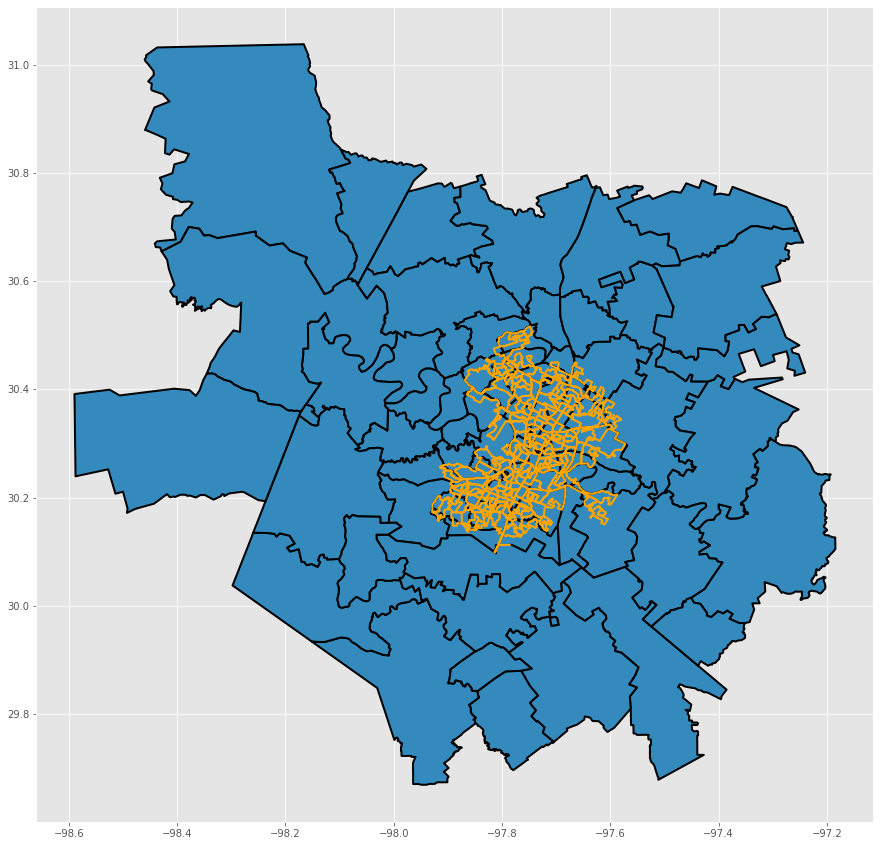

In [21]:

fig, ax = plt.subplots()

zips.geometry.plot(color=None, edgecolor='k',linewidth = 2,ax=ax)
routes.geometry.boundary.plot(color='Orange', edgecolor='k',linewidth = 2,ax=ax)

In [22]:
zip_coords = zips[['zipcode','geometry']]

route_coords = routes[['GARB_RT','geometry']]

In [23]:
zip_coords

,zipcode,geometry
0,78739,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ..."
1,78645,"MULTIPOLYGON (((-97.91075 30.50110, -97.91053 ..."
2,78602,"MULTIPOLYGON (((-97.27371 30.29662, -97.27323 ..."
3,78655,"MULTIPOLYGON (((-97.73690 29.78761, -97.73582 ..."
4,78617,"MULTIPOLYGON (((-97.51624 30.21906, -97.51600 ..."
...,...,...
75,78660,"MULTIPOLYGON (((-97.57653 30.50086, -97.57450 ..."
76,78662,"MULTIPOLYGON (((-97.45105 30.01521, -97.44517 ..."
77,78705,"MULTIPOLYGON (((-97.72978 30.29871, -97.72893 ..."
78,78701,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ..."


In [24]:
route_coords

,GARB_RT,geometry
0,PAH83,"MULTIPOLYGON (((-97.70618 30.36742, -97.70723 ..."
1,PAM54,"MULTIPOLYGON (((-97.83237 30.16213, -97.83237 ..."
2,PAM71,"MULTIPOLYGON (((-97.72977 30.19009, -97.72103 ..."
3,PAH54,"MULTIPOLYGON (((-97.65374 30.26269, -97.65322 ..."
4,PAW71,"MULTIPOLYGON (((-97.64683 30.38640, -97.64724 ..."
...,...,...
179,PAW63,"MULTIPOLYGON (((-97.77238 30.42130, -97.77238 ..."
180,PAM72,"MULTIPOLYGON (((-97.77343 30.14455, -97.77252 ..."
181,PAM73,"MULTIPOLYGON (((-97.77932 30.15112, -97.77839 ..."
182,PAT84,"MULTIPOLYGON (((-97.79986 30.24749, -97.79170 ..."


In [25]:
# Now we want to "flatten", or de-nest, the "geometry" object so that we can access the route points as a list of lists of tuples (yes, you read that correctly: a list of lists of tuples)
# Since each MULTIPOLYGON is a collection of points, we want to break those into indivudual points so that we can see if they fall into a specified zip code

r_coordinates = []

for row in route_coords['geometry']:
  denested = list(sum(mapping(row)["coordinates"],()))
  denested = list(sum(denested,()))
  r_coordinates.append(denested)

r_coordinates

[[(-97.70618263474258, 30.367416007124167),
  (-97.70723083139684, 30.36791375533362),
  (-97.7074246564424, 30.367997074594044),
  (-97.70815762240655, 30.368204787817838),
  (-97.70839779544698, 30.368266382471287),
  (-97.71039240914466, 30.369191383015206),
  (-97.71232918810323, 30.370081162482627),
  (-97.71306363435583, 30.37047591878818),
  (-97.71326961218773, 30.370593484800523),
  (-97.71354406818907, 30.370837143366728),
  (-97.71378286638812, 30.370949710940792),
  (-97.71601216360705, 30.371902086255187),
  (-97.7180073170934, 30.372829417673135),
  (-97.71867838635576, 30.373154865229072),
  (-97.71926997878393, 30.37351836893648),
  (-97.71966525177994, 30.3738892067379),
  (-97.71991570687187, 30.374296772221204),
  (-97.72000527176897, 30.3746103636661),
  (-97.7200504136327, 30.375115778521177),
  (-97.72050156511733, 30.37511363196709),
  (-97.72086185479377, 30.37508695938972),
  (-97.72131883723051, 30.37486952634214),
  (-97.72157188430286, 30.374698955891965),
 

In [30]:
# Now that we have our list of lists of tuples, let's iterate through each list's list of tuples (each tuple represents a point in space) and see if the zip code contains that point
idx = 0
for i in r_coordinates:
  for j in i:
    try:
      if Point(j).within(zip_coords['geometry'][idx]) or Point(j).intersects(zip_coords['geometry'][idx]):
        print("\n\n+++++++++++++++++++++++++++++++++")
        print("Route coordinate " + str(j) + " is within " + str(zip_coords['zipcode'][idx]))
    except:
      pass
    idx+=1
  idx=0



+++++++++++++++++++++++++++++++++
Route coordinate (-97.70965431427526, 30.392933939378604) is within 78758
1


+++++++++++++++++++++++++++++++++
Route coordinate (-97.83425382495773, 30.162745622232087) is within 78748
2


+++++++++++++++++++++++++++++++++
Route coordinate (-97.71075661602777, 30.156959578966564) is within 78744
3


+++++++++++++++++++++++++++++++++
Route coordinate (-97.65271920378144, 30.413546896917506) is within 78660
4


+++++++++++++++++++++++++++++++++
Route coordinate (-97.64567410444965, 30.299046575318517) is within 78724
5


+++++++++++++++++++++++++++++++++
Route coordinate (-97.79376027430621, 30.20672623416069) is within 78745
6


+++++++++++++++++++++++++++++++++
Route coordinate (-97.9027223820462, 30.197738151680035) is within 78739
7


+++++++++++++++++++++++++++++++++
Route coordinate (-97.92918724896559, 30.174917526091257) is within 78652
8


+++++++++++++++++++++++++++++++++
Route coordinate (-97.76234623960902, 30.164168551091183) is within 78